In [17]:
  !pip install koreanize-matplotlib

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib import rc
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [19]:
df = pd.read_excel('대구 클러스터링 표준화 전.xlsx')
df.head()

,행정구역,전체 노인인구,독거노인,병원 수,약국 수,경로당 수,공공체육시설 수,음식점 수,버스정류장 수,지하철 역 수,공원 수
0,중구,27903,5995,467,151,48,2,2989,118,10,17
1,동구,132702,28691,494,184,222,23,4497,583,13,91
2,서구,76139,18235,269,109,79,13,2375,189,4,28
3,남구,60695,15411,258,109,67,6,2176,164,9,24
4,북구,143943,27959,591,205,283,38,4957,592,14,130


In [20]:
dfStandard = df.drop(columns='행정구역')
dfStandard.head()

,전체 노인인구,독거노인,병원 수,약국 수,경로당 수,공공체육시설 수,음식점 수,버스정류장 수,지하철 역 수,공원 수
0,27903,5995,467,151,48,2,2989,118,10,17
1,132702,28691,494,184,222,23,4497,583,13,91
2,76139,18235,269,109,79,13,2375,189,4,28
3,60695,15411,258,109,67,6,2176,164,9,24
4,143943,27959,591,205,283,38,4957,592,14,130


In [21]:
scaler = StandardScaler()
df_standardized_values = scaler.fit_transform(dfStandard)
df_standardized = pd.DataFrame(df_standardized_values, columns=dfStandard.columns)

In [22]:
df_standardized['행정구역'] = df['행정구역']
print(df_standardized)

   전체 노인인구      독거노인       병원 수      약국 수     경로당 수  공공체육시설 수     음식점 수  \
0 -1.577599 -1.654516 -0.185920 -0.290513 -1.398634 -1.392024 -0.652242   
1  0.541816  0.771213 -0.067806  0.261253  0.269660 -0.180314  0.457112   
2 -0.602093 -0.346315 -1.052091 -0.992762 -1.101409 -0.757319 -1.103929   
3 -0.914426 -0.648142 -1.100211 -0.992762 -1.216464 -1.161222 -1.250322   
4  0.769150  0.692978  0.356530  0.612377  0.854521  0.685193  0.795509   
5  0.671004  0.316122  1.502674  0.846460  0.528533  0.338990  0.524056   
6  1.642042  1.693367  1.520173  1.799512  0.768230  0.742894  1.823207   
7 -0.529894 -0.824706 -0.973348 -1.243565  1.295564  1.723802 -0.593390   

    버스정류장 수   지하철 역 수      공원 수 행정구역  
0 -1.389848 -0.218218 -1.256847   중구  
1  0.776149  0.436436  0.088638   동구  
2 -1.059126 -1.527525 -1.056843   서구  
3 -1.175578 -0.436436 -1.129572   남구  
4  0.818072  0.654654  0.797746   북구  
5 -0.006405  1.527525  0.325008  수성구  
6  0.687646  0.872872  1.743222  달서구  
7  1.349090 

In [23]:
df_standardized.to_excel('대구 클러스터링 DF.xlsx', index=False)

In [24]:
dfAverage = pd.read_excel('대구 클러스터링 DF.xlsx')
dfAverage.drop(columns='행정구역', inplace=True)
dfAverage.head()


,전체 노인인구,독거노인,병원 수,약국 수,경로당 수,공공체육시설 수,음식점 수,버스정류장 수,지하철 역 수,공원 수
0,-1.577599,-1.654516,-0.185920,-0.290513,-1.398634,-1.392024,-0.652242,-1.389848,-0.218218,-1.256847
1,0.541816,0.771213,-0.067806,0.261253,0.269660,-0.180314,0.457112,0.776149,0.436436,0.088638
2,-0.602093,-0.346315,-1.052091,-0.992762,-1.101409,-0.757319,-1.103929,-1.059126,-1.527525,-1.056843
3,-0.914426,-0.648142,-1.100211,-0.992762,-1.216464,-1.161222,-1.250322,-1.175578,-0.436436,-1.129572
4,0.769150,0.692978,0.356530,0.612377,0.854521,0.685193,0.795509,0.818072,0.654654,0.797746


**KMeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

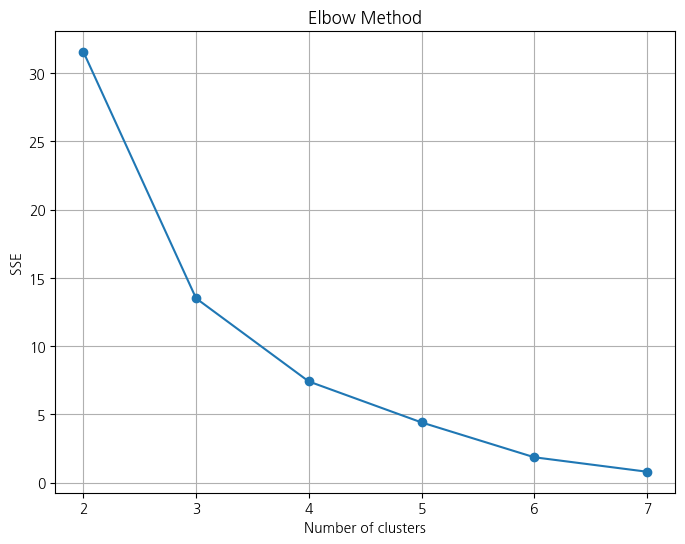

In [25]:
sse = []

K_range = range(2, len(dfAverage))

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfAverage)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

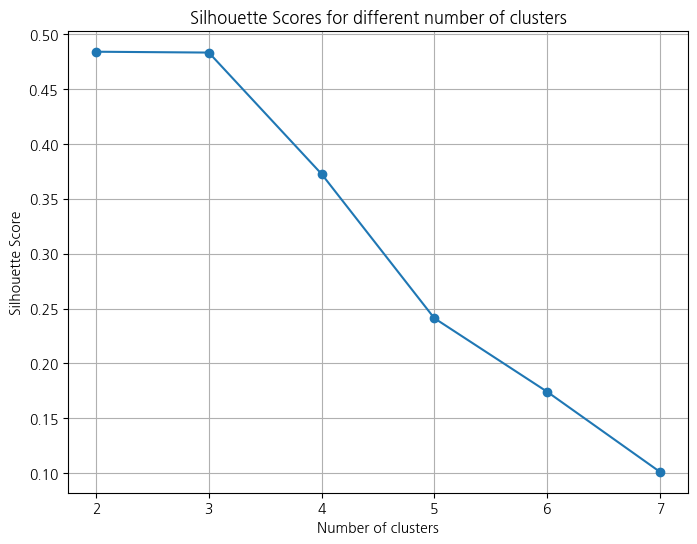

In [26]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# 클러스터 범위 설정
K_range = range(2,len(dfAverage) )  # 2에서 8 클러스터 시도

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dfAverage)
    score = silhouette_score(dfAverage, cluster_labels)
    silhouette_scores.append(score)

# Silhouette Score Plot 생성
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for different number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


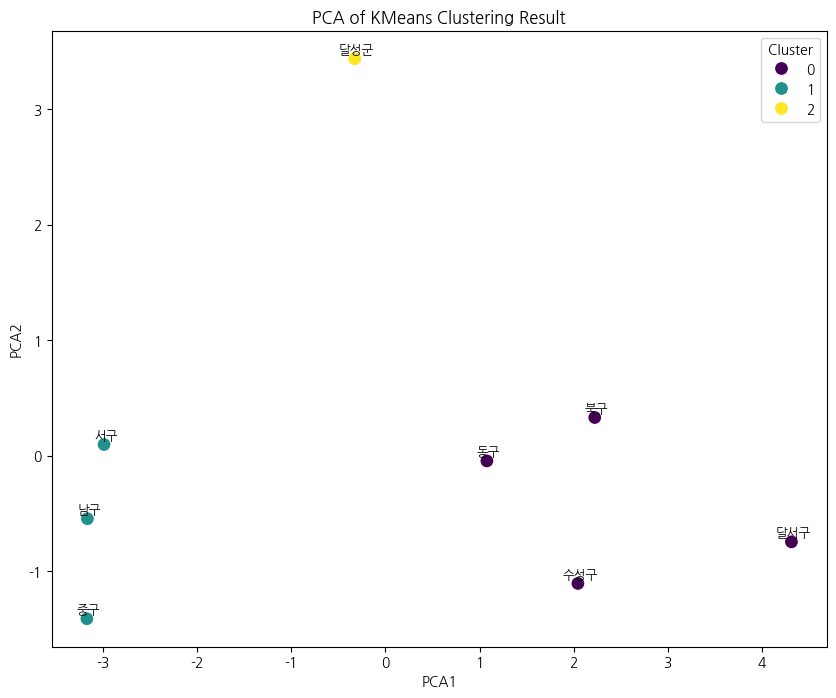

Cluster 0:
[1, 4, 5, 6]
Cluster 1:
[0, 2, 3]
Cluster 2:
[7]
Cluster 3:
[]


In [27]:
# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = pca_result[:, 0]
dfAverage['PCA2'] = pca_result[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=dfAverage, palette='viridis', s=100)
행정구역 = ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구','달성군']

for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i] + 0.02, txt, fontsize=9, ha='center', va='bottom')

plt.title('PCA of KMeans Clustering Result')
plt.legend(title='Cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [28]:
dfAverage.to_excel('S - KMeans클러스터링 결과(수정).xlsx', index=False)

**계층적 군집화**

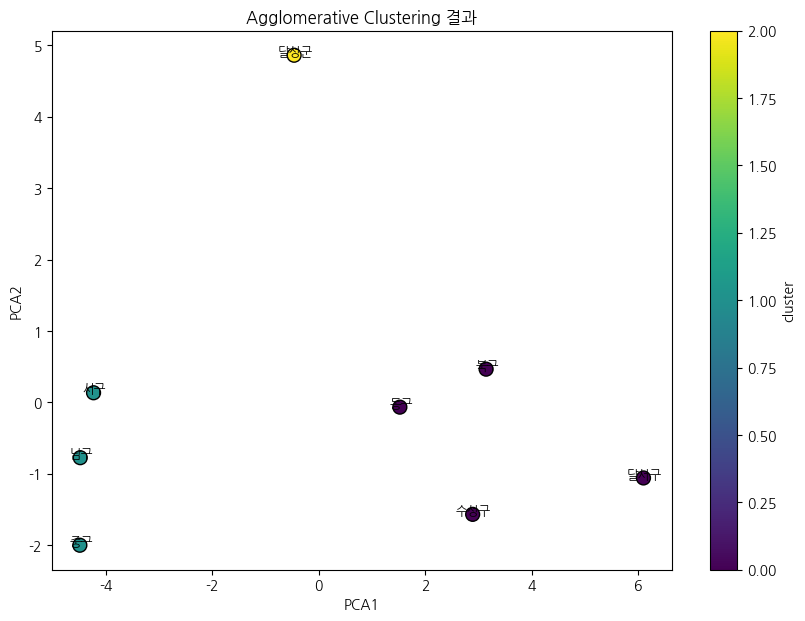

Cluster 0:
[1, 4, 5, 6]
Cluster 1:
[0, 2, 3]
Cluster 2:
[7]
Cluster 3:
[]


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters = agg.fit_predict(dfAverage)
dfAverage['cluster'] = clusters

# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))
dfAverage['PCA1'] = principal_components[:, 0]
dfAverage['PCA2'] = principal_components[:, 1]

# 2D 시각화
plt.figure(figsize=(10, 7))
plt.scatter(dfAverage['PCA1'], dfAverage['PCA2'], c=dfAverage['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(dfAverage['PCA1'][i] + 0.02, dfAverage['PCA2'][i], txt, fontsize=9, ha='center')

plt.title('Agglomerative Clustering 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())

In [30]:
dfAverage.to_excel('S - 계층적 군집화 결과.xlsx', index=False)

**K**-**Medoids**

In [31]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.2 MB/s eta 0:00:00


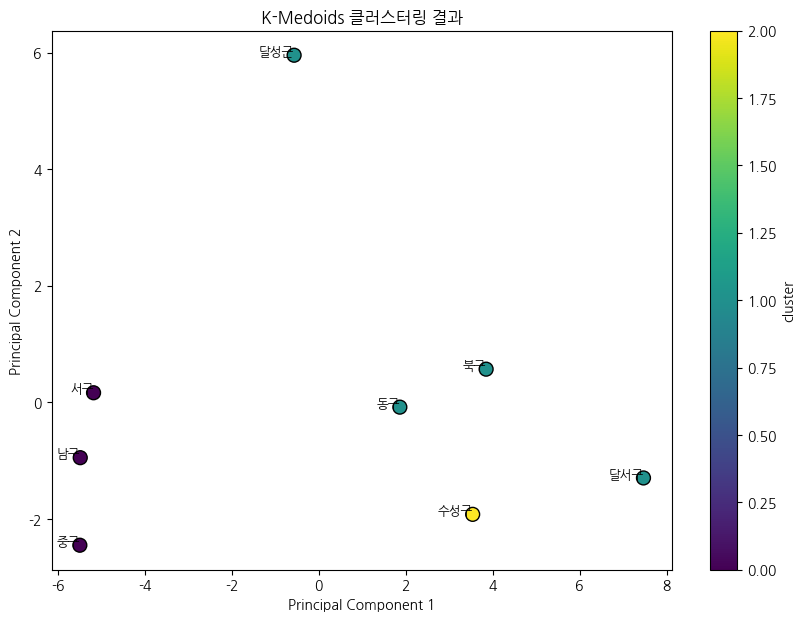

Cluster 0:
[0, 2, 3]
Cluster 1:
[1, 4, 6, 7]
Cluster 2:
[5]
Cluster 3:
[]


In [32]:
from sklearn_extra.cluster import KMedoids


# KMedoids 클러스터링
kmedoids = KMedoids(n_clusters=3, random_state=42)
clusters = kmedoids.fit_predict(dfAverage)
dfAverage['cluster'] = clusters



# PCA로 2D 차원 축소
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dfAverage.drop('cluster', axis=1))

# 2D 시각화
plt.figure(figsize=(10, 7))
sc = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                 c=dfAverage['cluster'], cmap='viridis', marker='o', s=100, edgecolor='k')

# 각 포인트에 행정구역 이름 레이블 추가
for i, txt in enumerate(행정구역):
    plt.text(principal_components[i, 0], principal_components[i, 1], txt, fontsize=9, ha='right')

plt.title('K-Medoids 클러스터링 결과')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(sc, label='cluster')
plt.show()

# 클러스터 인덱스 출력
for cluster_num in range(4):
    print(f"Cluster {cluster_num}:")
    print(dfAverage[dfAverage['cluster'] == cluster_num].index.tolist())


In [33]:
dfAverage.to_excel('S - K-Medoids클러스터링 결과.xlsx', index=False)